In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, r2_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

Analysis of different models plan
- Logistic regression with all features
- Logistic regression with feature selection
- CART with default parameters
- CART with cross validation
- Random forest with cross validation
- Boosted trees with cross validation
- Neural network with Keras

# EDA

In [13]:
# Load csv into dataframe
df = pd.read_csv('data/data_clean.csv')
df.head()

,customer_number,stage_grouped,max_closed_date,cloud_revenue,total_opp_amount,employees,country,industry,ee_count,contacts_count,...,part_request_events,part_request_days_used,share_events,share_days_used,tasks_events,tasks_days_used,version_control_events,version_control_days_used,web_review_events,web_review_days_used
0,11325,lost,8/15/24,15487.00,10497.00,850,UNITED STATES,Industrial/Instrumentation,4,70,...,176,48,63,6,82,11,10022,151,8051,133
1,11329,won,7/31/24,999.00,999.00,2683,UNITED STATES,Electronic Component and Semiconductor,17,301,...,8,7,48,13,29,7,8343,149,6650,131
2,11336,won,7/25/24,72231.75,72231.75,1893,UNITED STATES,Industrial/Instrumentation,55,241,...,0,0,1,1,0,0,502,78,147,17
3,11816,won,3/31/24,45747.30,154342.39,5000,UNITED STATES,Industrial/Instrumentation,23,85,...,27,14,4,2,20,10,2633,65,1052,59
4,11872,lost,11/7/23,15000.00,15000.00,129,UNITED STATES,Aerospace,21,115,...,1,1,0,0,0,0,64,6,2,2


In [14]:
# Summarize the data
df.describe()

,customer_number,cloud_revenue,total_opp_amount,employees,ee_count,contacts_count,non_ee_count,emb_world_attendees,email_clicks,a365_new_wb_visits,...,part_request_events,part_request_days_used,share_events,share_days_used,tasks_events,tasks_days_used,version_control_events,version_control_days_used,web_review_events,web_review_days_used
count,8.830000e+02,8.830000e+02,8.830000e+02,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,...,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,1.276521e+06,8.470720e+03,2.397318e+04,2406.430351,5.588901,33.310306,11.486976,0.001133,20.164213,4.465459,...,24.984145,3.944507,38.394111,7.044168,40.595696,7.101925,3571.361268,72.831257,4712.417894,58.964892
std,6.192995e+05,4.313707e+04,6.378526e+04,13835.695822,6.987823,65.009933,15.254255,0.033653,82.206760,18.799144,...,149.181743,13.113160,155.807278,13.254070,152.865119,16.747858,6870.728904,58.764431,9570.429890,56.211839
min,1.132500e+04,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.649320e+05,0.000000e+00,1.200000e+03,16.500000,1.000000,8.000000,2.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,3.500000,20.000000,3.500000
50%,1.556030e+06,1.253990e+03,9.701390e+03,60.000000,4.000000,19.000000,7.000000,0.000000,6.000000,0.000000,...,0.000000,0.000000,4.000000,2.000000,0.000000,0.000000,1050.000000,79.000000,764.000000,41.000000
75%,1.796156e+06,7.705480e+03,2.851199e+04,250.000000,7.500000,38.000000,15.000000,0.000000,17.000000,3.000000,...,3.000000,3.000000,24.000000,8.000000,11.000000,4.000000,4436.000000,126.000000,5341.000000,117.000000
max,1.958050e+06,1.218750e+06,1.297890e+06,195000.000000,59.000000,1083.000000,140.000000,1.000000,2091.000000,362.000000,...,2170.000000,140.000000,3041.000000,126.000000,2683.000000,136.000000,86477.000000,179.000000,95420.000000,181.000000


# Logistic Regression

## All features

In [15]:
# Add column converting stage_grouped to a 0/1
df['stage_grouped_num'] = df['stage_grouped'].apply(lambda x: 1 if x == 'won' else 0)
df.head()

,customer_number,stage_grouped,max_closed_date,cloud_revenue,total_opp_amount,employees,country,industry,ee_count,contacts_count,...,part_request_days_used,share_events,share_days_used,tasks_events,tasks_days_used,version_control_events,version_control_days_used,web_review_events,web_review_days_used,stage_grouped_num
0,11325,lost,8/15/24,15487.00,10497.00,850,UNITED STATES,Industrial/Instrumentation,4,70,...,48,63,6,82,11,10022,151,8051,133,0
1,11329,won,7/31/24,999.00,999.00,2683,UNITED STATES,Electronic Component and Semiconductor,17,301,...,7,48,13,29,7,8343,149,6650,131,1
2,11336,won,7/25/24,72231.75,72231.75,1893,UNITED STATES,Industrial/Instrumentation,55,241,...,0,1,1,0,0,502,78,147,17,1
3,11816,won,3/31/24,45747.30,154342.39,5000,UNITED STATES,Industrial/Instrumentation,23,85,...,14,4,2,20,10,2633,65,1052,59,1
4,11872,lost,11/7/23,15000.00,15000.00,129,UNITED STATES,Aerospace,21,115,...,1,0,0,0,0,64,6,2,2,0


In [16]:
# Drop customer_number, stage_grouped, max_closed_date, cloud_revenue, total_opp_amount from the dataframe
X = df.drop(['country','customer_number', 'stage_grouped', 'max_closed_date', 'cloud_revenue', 'total_opp_amount', 'stage_grouped_num'], axis=1)
y = df['stage_grouped_num']
print(X.shape, y.shape)

(883, 33) (883,)


In [17]:
# Perform one-hot encoding on the 'industry' column
X = pd.get_dummies(X, columns=['industry'], drop_first=True)
X.head()

,employees,ee_count,contacts_count,non_ee_count,emb_world_attendees,email_clicks,a365_new_wb_visits,a365_rest_wb_visits,total_webinars_attended,total_webinar_attendees,...,industry_Maritime,industry_Medical Device,industry_Medical Devices,industry_Military/Defense,industry_Non-Traditional Sectors,industry_Other,industry_Retail,industry_Service Bureau / Engineering Services,industry_Technology,industry_Telecommunications
0,850,4,70,31,0,64,38,204,3,3,...,False,False,False,False,False,False,False,False,False,False
1,2683,17,301,85,0,53,0,114,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1893,55,241,85,0,93,0,107,1,1,...,False,False,False,False,False,False,False,False,False,False
3,5000,23,85,26,0,148,9,103,7,11,...,False,False,False,False,False,False,False,False,False,False
4,129,21,115,50,0,5,0,9,1,1,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(618, 59) (265, 59) (618,) (265,)


In [19]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, X_test.shape)

(618, 59) (265, 59)


In [20]:
# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64       135
           1       0.62      0.50      0.55       130

    accuracy                           0.60       265
   macro avg       0.61      0.60      0.60       265
weighted avg       0.61      0.60      0.60       265



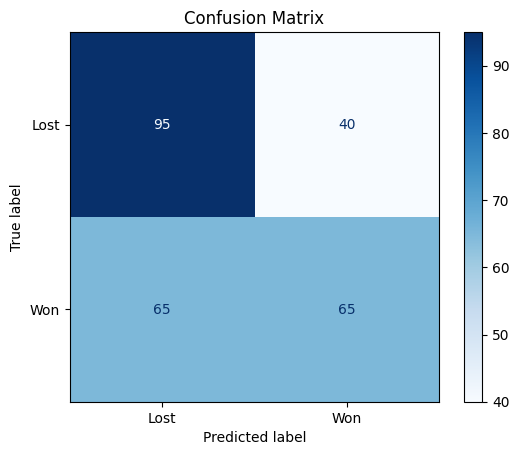

In [21]:
# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=['Lost', 'Won'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

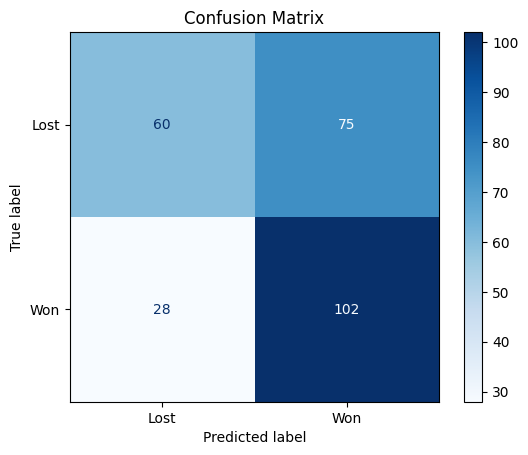

In [22]:
import seaborn as sns

# Custom confusion matrix
# Get predicted probabilities
y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Set custom threshold
threshold = 0.4
y_pred_threshold = (y_probs >= threshold).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_threshold)

# Display the confusion matrix with labels
disp_threshold = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_threshold), display_labels=['Lost', 'Won'])
disp_threshold.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

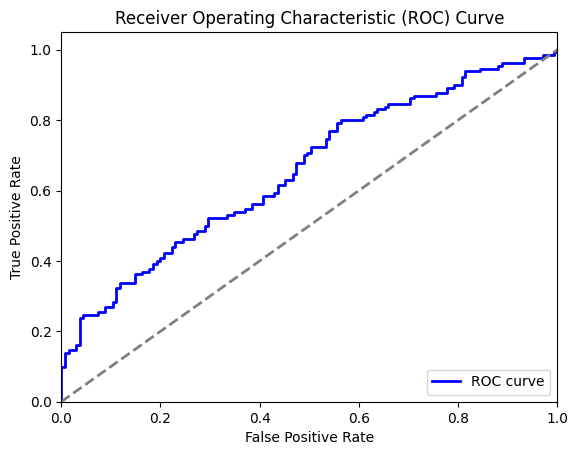

AUC: 0.6567521367521368


In [23]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

In [24]:
# Get the logistic regression coefficients
coefficients = logistic_model.coef_[0]

# Create a DataFrame to display the coefficients with their corresponding feature names
coeff_df = pd.DataFrame(coefficients, X.columns, columns=['Coefficient'])
# Sort the values by the coefficient value
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)
print(coeff_df)

                                                 Coefficient
multi_cad_events                                    0.808727
tasks_days_used                                     0.503572
comms_events                                        0.472965
libs_days_used                                      0.460877
industry_Aerospace                                  0.380811
total_webinar_attendees                             0.368680
industry_Industrial/Instrumentation                 0.297175
manufacturing_events                                0.282185
industry_Electronic Component and Semiconductor     0.265583
non_ee_count                                        0.236837
industry_Telecommunications                         0.228433
mcad_events                                         0.225040
industry_Medical Device                             0.220184
emb_world_attendees                                 0.191135
industry_Consumer Electronics                       0.179648
industry_Communications 

TODO: Check significance of coefficients and try with cross validation.

## Better feature selection

In [14]:
corr_matrix = X.corr()

# See anything with correlation > 0.6 or < -0.6
corr_matrix[(corr_matrix > 0.4) | (corr_matrix < -0.4)]

# Highly correlated features
# - ee_count / contacts_count / non_ee_count
# - total_webinars_attended / total_webinars_attendees

,employees,mk_fit_score,ee_count,contacts_count,non_ee_count,emb_world_attendees,email_clicks,a365_new_wb_visits,a365_rest_wb_visits,total_webinars_attended,...,industry_Manufacturing,industry_Maritime,industry_Medical Device,industry_Medical Devices,industry_Military/Defense,industry_Other,industry_Retail,industry_Service Bureau / Engineering Services,industry_Technology,industry_Telecommunications
employees,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mk_fit_score,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ee_count,NaN,NaN,1.000000,0.657774,0.750457,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contacts_count,NaN,NaN,0.657774,1.000000,0.723469,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
non_ee_count,NaN,NaN,0.750457,0.723469,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emb_world_attendees,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
email_clicks,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a365_new_wb_visits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a365_rest_wb_visits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_webinars_attended,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Drop customer_number, stage_grouped, max_closed_date, cloud_revenue, total_opp_amount from the dataframe
# Also drop ee_count, non_ee_count and total_webinars_attended due to high correlation
X = df.drop(['customer_number', 'stage_grouped', 'max_closed_date', 'cloud_revenue', 'total_opp_amount', 'stage_grouped_num', 'ee_count', 'non_ee_count', 'total_webinars_attended'], axis=1)
y = df['stage_grouped_num']
print(X.shape, y.shape)

(1011, 31) (1011,)


In [16]:
# Perform one-hot encoding on the 'industry' column
X = pd.get_dummies(X, columns=['industry'], drop_first=True)
X.head()

,employees,mk_fit_score,contacts_count,emb_world_attendees,email_clicks,a365_new_wb_visits,a365_rest_wb_visits,total_webinar_attendees,assembly_app_events,assembly_app_days_used,...,industry_Manufacturing,industry_Maritime,industry_Medical Device,industry_Medical Devices,industry_Military/Defense,industry_Other,industry_Retail,industry_Service Bureau / Engineering Services,industry_Technology,industry_Telecommunications
0,823,0,187,0,10,0,33,0,2,2,...,False,False,False,False,False,False,False,False,False,False
1,0,0,107,0,85,3,27,14,6,6,...,False,False,False,False,False,False,False,False,False,False
2,0,0,0,0,2,0,2,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,300,0,43,0,28,3,166,2,4,3,...,False,False,False,False,False,False,False,False,False,False
4,8,0,3,0,2,0,11,0,1,1,...,False,False,False,False,False,False,False,False,False,False


In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, X_test.shape)

(707, 56) (304, 56) (707,) (304,)
(707, 56) (304, 56)


In [18]:
# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[130  35]
 [ 96  43]]
              precision    recall  f1-score   support

           0       0.58      0.79      0.66       165
           1       0.55      0.31      0.40       139

    accuracy                           0.57       304
   macro avg       0.56      0.55      0.53       304
weighted avg       0.56      0.57      0.54       304



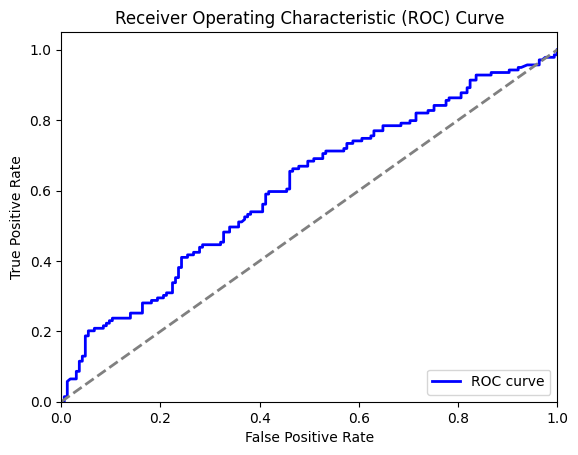

AUC: 0.6089165031611075


In [19]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

# CART

## CART model with default parameters

In [20]:
# Create the CART model
cart_model = DecisionTreeClassifier(random_state=42)
# cp = 0.0 in default (will be as complex as necessary)

# Train the model
cart_model.fit(X_train, y_train)

# Make predictions
y_pred_cart = cart_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_cart))
print(classification_report(y_test, y_pred_cart))

[[105  60]
 [ 80  59]]
              precision    recall  f1-score   support

           0       0.57      0.64      0.60       165
           1       0.50      0.42      0.46       139

    accuracy                           0.54       304
   macro avg       0.53      0.53      0.53       304
weighted avg       0.53      0.54      0.53       304



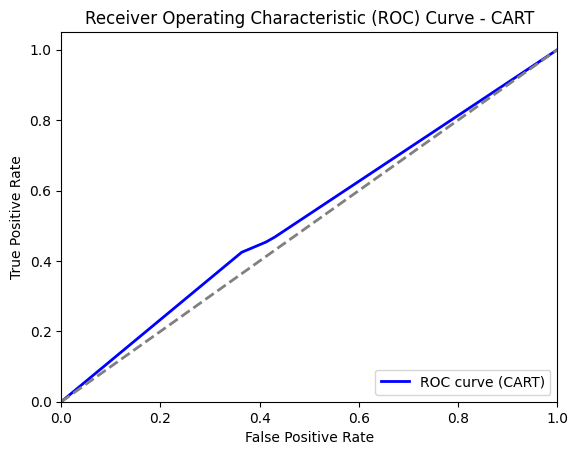

AUC (CART): 0.5248746457379551


In [21]:
# Calculate the ROC curve
fpr_cart, tpr_cart, thresholds_cart = roc_curve(y_test, cart_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure()
plt.plot(fpr_cart, tpr_cart, color='blue', lw=2, label='ROC curve (CART)')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - CART')
plt.legend(loc="lower right")
plt.show()

# Calculate the AUC
roc_auc_cart = auc(fpr_cart, tpr_cart)
print(f'AUC (CART): {roc_auc_cart}')

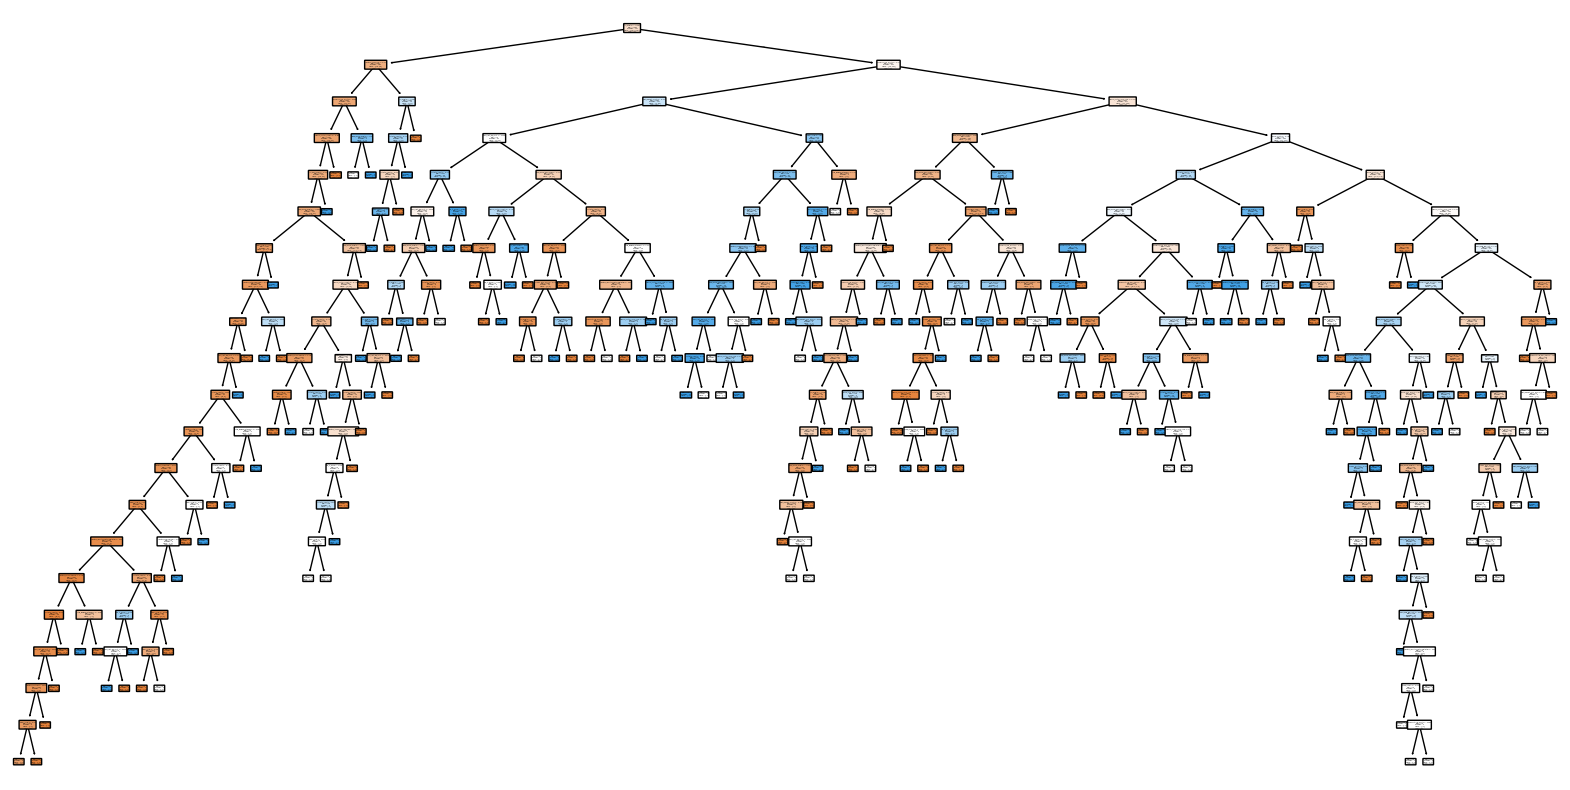

In [22]:
plt.figure(figsize=(20, 10))
plot_tree(cart_model, feature_names=X.columns, class_names=['lost', 'won'], filled=True, rounded=True)
plt.show()

## CART model with cross validation on cp

In [23]:
# Define the parameter grid
param_grid = {'ccp_alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]}

# Create the CART model
cart_model = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(cart_model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_cart_model = grid_search.best_estimator_

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best parameters: {'ccp_alpha': 0.1}
Best cross-validation score: 0.5770824949698189


# Random Forest

# Boosted Trees

# Neural Network